# SKN 19기 mini-project 5팀(팀명: 여권어디있지) M/L

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# pandas 출력 옵션
pd.set_option('display.float_format', '{:.2f}'.format)

# 한글 폰트 사용을 위한 설정
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

## 데이터 로드

In [4]:
# 데이터 로드
df_listings = pd.read_csv('./data/listings.csv')

df_listings.head(5)

,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,first_review,...,amnt_ev_charger,amnt_crib,amnt_king_bed,amnt_gym,amnt_breakfast,amnt_fireplace,amnt_smoking_allowed,amnt_waterfront,amnt_smoke_alarm,amnt_carbon_monoxide_alarm
0,Bunkyo Ku,Entire rental unit,Entire home/apt,3,1.00,0.00,2.00,100000.00,0,NaN,...,0,0,0,0,0,1,0,0,1,0
1,Bunkyo Ku,Entire rental unit,Entire home/apt,8,1.00,2.00,5.00,100000.00,0,NaN,...,0,0,0,0,0,1,0,0,1,0
2,Taito Ku,Entire serviced apartment,Entire home/apt,4,2.00,2.00,2.00,14550.00,24,2023-12-04,...,0,0,0,0,0,0,0,0,1,1
3,Kita Ku,Entire home,Entire home/apt,8,1.00,3.00,6.00,22012.00,15,2024-01-10,...,0,0,0,0,0,0,0,0,1,1
4,Sumida Ku,Entire rental unit,Entire home/apt,3,1.00,1.00,1.00,15429.00,17,2023-12-26,...,0,1,0,0,0,1,0,0,1,1


In [5]:
# 5.2 추가 전처리 진행
# 컬럼 삭제
df_listings = df_listings.drop(['property_type', 'amenities'], axis=1, errors='ignore')

In [6]:
# 데이터 확인
print(df_listings.info())
print('-' * 50)
df_listings.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23007 entries, 0 to 23006
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   neighbourhood_cleansed      23007 non-null  object 
 1   room_type                   23007 non-null  object 
 2   accommodates                23007 non-null  int64  
 3   bathrooms                   23007 non-null  float64
 4   bedrooms                    23007 non-null  float64
 5   beds                        23007 non-null  float64
 6   price                       23007 non-null  float64
 7   number_of_reviews           23007 non-null  int64  
 8   first_review                19875 non-null  object 
 9   review_scores_rating        19875 non-null  float64
 10  amnt_self_checkin           23007 non-null  int64  
 11  amnt_instant_book           23007 non-null  int64  
 12  amnt_kitchen                23007 non-null  int64  
 13  amnt_hair_dryer             230

,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,first_review,review_scores_rating,...,amnt_ev_charger,amnt_crib,amnt_king_bed,amnt_gym,amnt_breakfast,amnt_fireplace,amnt_smoking_allowed,amnt_waterfront,amnt_smoke_alarm,amnt_carbon_monoxide_alarm
count,23007,23007,23007.00,23007.00,23007.00,23007.00,23007.00,23007.00,19875,19875.00,...,23007.00,23007.00,23007.00,23007.00,23007.00,23007.00,23007.00,23007.00,23007.00,23007.00
unique,49,4,NaN,NaN,NaN,NaN,NaN,NaN,2946,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Shinjuku Ku,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-30,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4311,19885,NaN,NaN,NaN,NaN,NaN,NaN,66,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,4.44,1.15,1.39,2.90,17758.09,37.97,NaN,4.73,...,0.00,0.10,0.00,0.01,0.00,0.20,0.02,0.02,0.96,0.42
std,NaN,NaN,2.89,0.49,0.94,2.19,12886.22,67.66,NaN,0.32,...,0.05,0.29,0.00,0.11,0.06,0.40,0.15,0.13,0.20,0.49
min,NaN,NaN,1.00,0.00,0.00,0.00,1700.00,0.00,NaN,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,NaN,NaN,2.00,1.00,1.00,1.00,9429.00,3.00,NaN,4.63,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
50%,NaN,NaN,4.00,1.00,1.00,2.00,13912.00,18.00,NaN,4.80,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,NaN,NaN,6.00,1.00,2.00,4.00,21572.00,45.00,NaN,4.94,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00


In [7]:

# 6. 데이터 변환 및 피처 엔지니어링

# 1) 범주형 컬럼의 데이터 변환
# 1.1) neighbourhood_cleansed, room-type 컬럼의 라벨 인코딩
# - 순서가 있는 범주형 변수는 아니지만 Gredint Boosting 알고리즘으로 모델링 할 예정이므로 원핫 인코딩 대신 라벨 인코딩 사용
# - 순서가 없는 범주에 라벨 인코딩 사용은,
# - 거리 기반/선형 모델에는 적합하지 않으나 (숫자 크기가 인위적 순서 의미를 만들어버림 → 잘못된 해석 위험)
# - 트리 모델은 값의 크기 자체보다는 분할 조건(같다/다르다)을 이용하므로, 라벨 인코딩을 써도 문제가 거의 없음
from sklearn.preprocessing import LabelEncoder

le_neighbourhood = LabelEncoder()
le_room_type = LabelEncoder()

df_listings['neighbourhood_cleansed_encoded'] = le_neighbourhood.fit_transform(df_listings['neighbourhood_cleansed'])
df_listings['room_type_encoded'] = le_room_type.fit_transform(df_listings['room_type'])

# 결과 확인
df_listings[['neighbourhood_cleansed', 'neighbourhood_cleansed_encoded',
             'room_type', 'room_type_encoded']].head(10)

,neighbourhood_cleansed,neighbourhood_cleansed_encoded,room_type,room_type_encoded
0,Bunkyo Ku,4,Entire home/apt,0
1,Bunkyo Ku,4,Entire home/apt,0
2,Taito Ku,46,Entire home/apt,0
3,Kita Ku,20,Entire home/apt,0
4,Sumida Ku,44,Entire home/apt,0
5,Sumida Ku,44,Entire home/apt,0
6,Kita Ku,20,Entire home/apt,0
7,Koto Ku,26,Entire home/apt,0
8,Taito Ku,46,Shared room,3
9,Taito Ku,46,Shared room,3


In [8]:
# 1.2) first_rivew 컬럼의 데이터 타입 변환
df_listings['first_review'] = pd.to_datetime(df_listings['first_review'], errors='coerce')

print(df_listings['first_review'].dtype)
print('-' * 50)
df_listings[['first_review']].head(15)

datetime64[ns]
--------------------------------------------------


,first_review
0,NaT
1,NaT
2,2023-12-04
3,2024-01-10
4,2023-12-26
5,2023-12-26
6,2023-12-10
7,2023-12-24
8,2023-12-10
9,2023-12-07


In [9]:
# 2) 피처 엔지니어링
# - 숙소의 open 시기가 다르므로 number_of_riews와 first_review를 이용해 새로운 특성 생성

# 기준 날짜 설정
reference_date = pd.to_datetime('2025-06-27')
# first_review가 결측치인 경우 NaT로 처리되어도 안전하게 계산
df_listings['days_since_first_review'] = (reference_date - df_listings['first_review']).dt.days
# 결측치가 있으면 결과도 NaN
df_listings['reviews_per_day_since_first_review'] = df_listings['number_of_reviews'] / df_listings['days_since_first_review']
# 결과 확인
df_listings[['number_of_reviews', 'first_review', 'days_since_first_review', 
             'reviews_per_day_since_first_review']].head(10)


,number_of_reviews,first_review,days_since_first_review,reviews_per_day_since_first_review
0,0,NaT,NaN,NaN
1,0,NaT,NaN,NaN
2,24,2023-12-04,571.00,0.04
3,15,2024-01-10,534.00,0.03
4,17,2023-12-26,549.00,0.03
5,14,2023-12-26,549.00,0.03
6,47,2023-12-10,565.00,0.08
7,56,2023-12-24,551.00,0.10
8,70,2023-12-10,565.00,0.12
9,55,2023-12-07,568.00,0.10


In [10]:
# reviews_per_day_since_first_review가 무한대값이 나오는 값의 NaN값 처리

mask = df_listings['days_since_first_review'] == 0
df_listings.loc[mask & (df_listings['reviews_per_day_since_first_review'] == np.inf), 'reviews_per_day_since_first_review'] = np.nan

In [11]:
# 데이터 재확인
# - 리뷰 비율 컬럼과 리뷰 평점 컬럼에 결측치가 존재하나,
# - 부스팅 모델은 결측치를 자체적으로 처리하는 기능을 가지고 있으므로 결측치를 삭제하지 않고 모델 학습 진행
# - 예. XGBoost는 결측치가 있는 샘플은 손실을 최소화하는 방향으로 자동으로 배치
# - 예. LightGBM은 NaN 자체를 별도의 카테고리로 인식해 분기시 NaN 전용 경로로 학습하여 과적합 위험을 최소화 함
print(df_listings.info())
df_listings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23007 entries, 0 to 23006
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   neighbourhood_cleansed              23007 non-null  object        
 1   room_type                           23007 non-null  object        
 2   accommodates                        23007 non-null  int64         
 3   bathrooms                           23007 non-null  float64       
 4   bedrooms                            23007 non-null  float64       
 5   beds                                23007 non-null  float64       
 6   price                               23007 non-null  float64       
 7   number_of_reviews                   23007 non-null  int64         
 8   first_review                        19875 non-null  datetime64[ns]
 9   review_scores_rating                19875 non-null  float64       
 10  amnt_self_checkin     

,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,first_review,review_scores_rating,...,amnt_breakfast,amnt_fireplace,amnt_smoking_allowed,amnt_waterfront,amnt_smoke_alarm,amnt_carbon_monoxide_alarm,neighbourhood_cleansed_encoded,room_type_encoded,days_since_first_review,reviews_per_day_since_first_review
0,Bunkyo Ku,Entire home/apt,3,1.00,0.00,2.00,100000.00,0,NaT,NaN,...,0,1,0,0,1,0,4,0,NaN,NaN
1,Bunkyo Ku,Entire home/apt,8,1.00,2.00,5.00,100000.00,0,NaT,NaN,...,0,1,0,0,1,0,4,0,NaN,NaN
2,Taito Ku,Entire home/apt,4,2.00,2.00,2.00,14550.00,24,2023-12-04,4.42,...,0,0,0,0,1,1,46,0,571.00,0.04
3,Kita Ku,Entire home/apt,8,1.00,3.00,6.00,22012.00,15,2024-01-10,4.73,...,0,0,0,0,1,1,20,0,534.00,0.03
4,Sumida Ku,Entire home/apt,3,1.00,1.00,1.00,15429.00,17,2023-12-26,5.00,...,0,1,0,0,1,1,44,0,549.00,0.03
5,Sumida Ku,Entire home/apt,3,1.00,1.00,1.00,11700.00,14,2023-12-26,4.93,...,0,1,0,0,1,1,44,0,549.00,0.03
6,Kita Ku,Entire home/apt,12,1.00,4.00,3.00,14000.00,47,2023-12-10,4.96,...,0,1,1,0,1,0,20,0,565.00,0.08
7,Koto Ku,Entire home/apt,6,1.00,1.00,1.00,19758.00,56,2023-12-24,4.88,...,0,1,0,0,1,0,26,0,551.00,0.10
8,Taito Ku,Shared room,1,3.00,1.00,1.00,1808.00,70,2023-12-10,4.67,...,0,0,0,1,1,0,46,3,565.00,0.12
9,Taito Ku,Shared room,1,3.00,1.00,1.00,1808.00,55,2023-12-07,4.69,...,0,0,0,1,1,0,46,3,568.00,0.10


In [12]:
# 모델 학습을 시키기 위한 컬럼만 추출
# 제외할 컬럼 리스트
cols_to_exclude = ['neighbourhood_cleansed', 'room_type', 'number_of_reviews', 
                   'first_review']

# 제외 후 새로운 데이터프레임 생성
df_listings_f = df_listings.drop(columns=cols_to_exclude)

# 결과 확인
df_listings_f.head(10)

,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating,amnt_self_checkin,amnt_instant_book,amnt_kitchen,amnt_hair_dryer,...,amnt_breakfast,amnt_fireplace,amnt_smoking_allowed,amnt_waterfront,amnt_smoke_alarm,amnt_carbon_monoxide_alarm,neighbourhood_cleansed_encoded,room_type_encoded,days_since_first_review,reviews_per_day_since_first_review
0,3,1.00,0.00,2.00,100000.00,NaN,1,0,1,1,...,0,1,0,0,1,0,4,0,NaN,NaN
1,8,1.00,2.00,5.00,100000.00,NaN,1,0,1,1,...,0,1,0,0,1,0,4,0,NaN,NaN
2,4,2.00,2.00,2.00,14550.00,4.42,1,0,1,1,...,0,0,0,0,1,1,46,0,571.00,0.04
3,8,1.00,3.00,6.00,22012.00,4.73,1,0,1,1,...,0,0,0,0,1,1,20,0,534.00,0.03
4,3,1.00,1.00,1.00,15429.00,5.00,1,0,1,1,...,0,1,0,0,1,1,44,0,549.00,0.03
5,3,1.00,1.00,1.00,11700.00,4.93,1,0,1,1,...,0,1,0,0,1,1,44,0,549.00,0.03
6,12,1.00,4.00,3.00,14000.00,4.96,0,0,1,1,...,0,1,1,0,1,0,20,0,565.00,0.08
7,6,1.00,1.00,1.00,19758.00,4.88,1,0,1,1,...,0,1,0,0,1,0,26,0,551.00,0.10
8,1,3.00,1.00,1.00,1808.00,4.67,1,0,0,1,...,0,0,0,1,1,0,46,3,565.00,0.12
9,1,3.00,1.00,1.00,1808.00,4.69,1,0,0,1,...,0,0,0,1,1,0,46,3,568.00,0.10


In [13]:
# 7. 데이터 분할
from sklearn.model_selection import train_test_split

target = 'price'

X = df_listings_f.drop(columns=[target])
y = df_listings_f[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# 모델 학습
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
import lightgbm as lgb

# 1) XGBoost 알고리즘 선택
# - DMatrix는 XGBoost 전용 데이터 구조로서, DMatrix로 변환하면 학습 속도와 메모리 효율이 좋아지고 결측치 처리도 편리
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
y_train.replace([np.inf, -np.inf], np.nan, inplace=True)
y_test.replace([np.inf, -np.inf], np.nan, inplace=True)

dtrain = xgb.DMatrix(X_train, label=y_train, missing=np.nan)
dtest = xgb.DMatrix(X_test, label=y_test, missing=np.nan)

params_xgb = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'seed': 42
}

xgb_model = xgb.train(params_xgb, dtrain, num_boost_round=100)
y_pred_xgb = xgb_model.predict(dtest)

# 훈련 데이터 성능
y_pred_train_xgb = xgb_model.predict(dtrain)
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_pred_train_xgb))

# 테스트 데이터 성능
y_pred_test_xgb = xgb_model.predict(dtest)
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_pred_test_xgb))

# 출력
print(f"XGBoost Train → R2: {r2_train_xgb:.4f}, RMSE: {rmse_train_xgb:.2f}")
print(f"XGBoost Test  → R2: {r2_test_xgb:.4f}, RMSE: {rmse_test_xgb:.2f}")


XGBoost Train → R2: 0.8129, RMSE: 5580.36
XGBoost Test  → R2: 0.6035, RMSE: 8076.68


In [21]:
# 2) LightGBM 알고리즘 선택
# - Dataset 은 LightGBM 전용 데이터 구조로서, 학습 최적화와 결측치 자동 처리 기능을 제공
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_test = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

params_lgb = {
    'objective': 'regression',
    'metric': 'rmse',
    'seed': 42
}

lgb_model = lgb.train(
    params_lgb,
    lgb_train,
    num_boost_round=100,
    valid_sets=[lgb_train, lgb_test],
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

# 훈련 데이터 성능
y_pred_train_lgb = lgb_model.predict(X_train, num_iteration=lgb_model.best_iteration)
r2_train_lgb = r2_score(y_train, y_pred_train_lgb)
rmse_train_lgb = np.sqrt(mean_squared_error(y_train, y_pred_train_lgb))

# 테스트 데이터 성능
y_pred_test_lgb = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
r2_test_lgb = r2_score(y_test, y_pred_test_lgb)
rmse_test_lgb = np.sqrt(mean_squared_error(y_test, y_pred_test_lgb))

# 출력
print(f"LightGBM Train → R2: {r2_train_lgb:.4f}, RMSE: {rmse_train_lgb:.2f}")
print(f"LightGBM Test  → R2: {r2_test_lgb:.4f}, RMSE: {rmse_test_lgb:.2f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 18405, number of used features: 33
[LightGBM] [Info] Start training from score 17738.167651
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[99]	training's rmse: 7290.63	valid_1's rmse: 8119.43
LightGBM Train → R2: 0.6806, RMSE: 7290.63
LightGBM Test  → R2: 0.5993, RMSE: 8119.43


In [19]:
# 하이퍼파라미터 튜닝
# 1) 랜덤 서치
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

# 하이퍼파라미터 후보 설정
param_dist = {
    'num_leaves': [31, 50, 70, 100],
    'max_depth': [-1, 5, 10, 15, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 300, 500, 1000],
    'min_child_samples': [5, 10, 20, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}

# LightGBM 회귀 모델 객체
lgb_model = lgb.LGBMRegressor(random_state=42)

# R2 기준 스코어러
r2_scorer = make_scorer(r2_score)

# 랜덤서치 설정
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
    n_iter=50,               # 50개의 랜덤 조합 시도
    scoring=r2_scorer,
    cv=5,                    # 5-폴드 교차검증
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# 학습
random_search.fit(X_train, y_train)

# 최적 파라미터와 최고 R2 확인
print("Best Parameters:", random_search.best_params_)
print("Best R2 Score:", random_search.best_score_)
best_model = random_search.best_estimator_

# 훈련 데이터에서 평가
y_train_pred = best_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"Train R2: {r2_train:.4f}, Train RMSE: {rmse_train:.2f}")

# 테스트 데이터에서 평가
y_pred = best_model.predict(X_test)
r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test R2: {r2_test:.4f}, Test RMSE: {rmse_test:.2f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


  File "c:\Users\Playdata\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\Playdata\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Playdata\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Playdata\anaconda3\Lib

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 18405, number of used features: 33
[LightGBM] [Info] Start training from score 17738.167651
Best Parameters: {'subsample': 0.6, 'reg_lambda': 0.1, 'reg_alpha': 1, 'num_leaves': 50, 'n_estimators': 1000, 'min_child_samples': 5, 'max_depth': -1, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
Best R2 Score: 0.598588925155187
Train R2: 0.8942, Train RMSE: 4196.67
Test R2: 0.6258, Test RMSE: 7846.11


In [ ]:
# # 2) 그리드 서치
# from sklearn.model_selection import GridSearchCV

# # 랜덤서치에서 찾은 최적 파라미터
# best_params = {
#     'subsample': 0.6,
#     'reg_lambda': 0.5,
#     'reg_alpha': 0.1,
#     'num_leaves': 50,
#     'n_estimators': 1000,
#     'min_child_samples': 20,
#     'max_depth': 15,
#     'learning_rate': 0.01,
#     'colsample_bytree': 0.6
# }

# # 그리드 서치용 후보 범위(최적 파라미터 기준 ± 주변 값)
# param_grid = {
#     'num_leaves': [45, 50, 55], # 하나의 트리가 가질 수 있는 최대 리프 개수
#     'max_depth': [12, 15, 18],
#     'learning_rate': [0.01, 0.02, 0.03],
#     'n_estimators': [900, 1000, 1100],
#     'min_child_samples': [15, 20, 25], # 리프 노드가 되기 위해 최소한으로 필요한 레코드 수 
#     'subsample': [0.6, 0.7, 0.8], # 데이터 샘플링 비율
#     'colsample_bytree': [0.6, 0.7, 0.8], # 무작위로 선택하는 특성의 비율
# }

# # LightGBM 모델 객체
# lgb_model = lgb.LGBMRegressor(random_state=42)

# # R2 기준 스코어러
# r2_scorer = make_scorer(r2_score)

# # 그리드 서치 설정
# grid_search = GridSearchCV(
#     estimator=lgb_model,
#     param_grid=param_grid,
#     scoring=r2_scorer,
#     cv=5,       
#     n_jobs=-1,
#     verbose=1
# )

# # 학습
# grid_search.fit(X_train, y_train)

# # 최적 파라미터와 최고 R2 확인
# print("Best Parameters (GridSearch):", grid_search.best_params_)
# print("Best R2 Score (CV):", grid_search.best_score_)

# # 테스트 데이터에서 평가
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)
# r2_test = r2_score(y_test, y_pred)
# rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f"Test R2: {r2_test:.4f}, Test RMSE: {rmse_test:.2f}")

In [22]:
# 특성 중요도 파악

# best_model은 RandomizedSearchCV 등으로 학습된 LGBM 모델
feature_importances = best_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                               Feature  Importance
34             days_since_first_review        7745
35  reviews_per_day_since_first_review        7379
32      neighbourhood_cleansed_encoded        5810
4                 review_scores_rating        5257
0                         accommodates        4313
3                                 beds        3546
2                             bedrooms        2271
1                            bathrooms        1694
19                           amnt_iron        1067
18                      amnt_workspace        1066
31          amnt_carbon_monoxide_alarm        1051
9                    amnt_free_parking         996
21                        amnt_bathtub         992
5                    amnt_self_checkin         901
33                   room_type_encoded         753
23                           amnt_crib         681
16                        amnt_heating         547
12                      amnt_bbq_grill         535
27                      amnt_fi

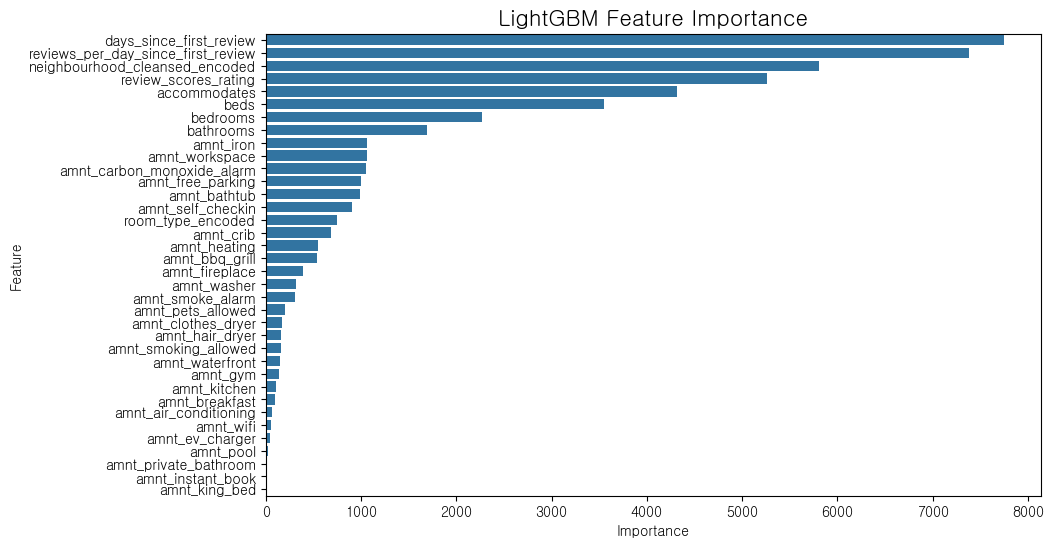

In [23]:
# 중요도 시각화

importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x="Importance", 
    y="Feature", 
    data=importance_df,
    order=importance_df["Feature"]  # 중요도 순서 반영
)
plt.title("LightGBM Feature Importance", fontsize=16)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
# 과대적합 방지를 위해 특성 숫자 축소
# 중요도 상위 10개 특성 추출
top10_features = (
    importance_df
    .sort_values(by="Importance", ascending=False)
    .head(10)["Feature"]
    .tolist()
)

# 원본 데이터프레임에서 해당 컬럼만 선택
df_listings_f2 = df_listings.loc[:, top10_features].copy()

# 확인: 중요도 높은 순서대로 컬럼 출력
print("상위 10개 특성 (중요도 순):", top10_features)
df_listings_f2.head()


상위 10개 특성 (중요도 순): ['days_since_first_review', 'reviews_per_day_since_first_review', 'neighbourhood_cleansed_encoded', 'review_scores_rating', 'accommodates', 'beds', 'bedrooms', 'bathrooms', 'amnt_iron', 'amnt_workspace']


,days_since_first_review,reviews_per_day_since_first_review,neighbourhood_cleansed_encoded,review_scores_rating,accommodates,beds,bedrooms,bathrooms,amnt_iron,amnt_workspace
0,NaN,NaN,4,NaN,3,2.00,0.00,1.00,0,0
1,NaN,NaN,4,NaN,8,5.00,2.00,1.00,0,0
2,571.00,0.04,46,4.42,4,2.00,2.00,2.00,0,0
3,534.00,0.03,20,4.73,8,6.00,3.00,1.00,1,0
4,549.00,0.03,44,5.00,3,1.00,1.00,1.00,1,1


In [30]:
# 다시 모델링 진행
# 데이터 분할
from sklearn.model_selection import train_test_split

target = 'price'

X = df_listings_f2
y = df_listings_f[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 알고리즘 선택
# - Dataset 은 LightGBM 전용 데이터 구조로서, 학습 최적화와 결측치 자동 처리 기능을 제공
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_test = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

params_lgb = {
    'objective': 'regression',
    'metric': 'rmse',
    'seed': 42
}

lgb_model = lgb.train(
    params_lgb,
    lgb_train,
    num_boost_round=100,
    valid_sets=[lgb_train, lgb_test],
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

# 훈련 데이터 성능
y_pred_train_lgb = lgb_model.predict(X_train, num_iteration=lgb_model.best_iteration)
r2_train_lgb = r2_score(y_train, y_pred_train_lgb)
rmse_train_lgb = np.sqrt(mean_squared_error(y_train, y_pred_train_lgb))

# 테스트 데이터 성능
y_pred_test_lgb = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
r2_test_lgb = r2_score(y_test, y_pred_test_lgb)
rmse_test_lgb = np.sqrt(mean_squared_error(y_test, y_pred_test_lgb))

# 출력
print(f"LightGBM Train → R2: {r2_train_lgb:.4f}, RMSE: {rmse_train_lgb:.2f}")
print(f"LightGBM Test  → R2: {r2_test_lgb:.4f}, RMSE: {rmse_test_lgb:.2f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 746
[LightGBM] [Info] Number of data points in the train set: 18405, number of used features: 10
[LightGBM] [Info] Start training from score 17738.167651
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[99]	training's rmse: 7592.37	valid_1's rmse: 8246.47
LightGBM Train → R2: 0.6536, RMSE: 7592.37
LightGBM Test  → R2: 0.5867, RMSE: 8246.47


In [ ]:
# 하이퍼파라미터 튜닝
# 1) 랜덤 서치
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

# 하이퍼파라미터 후보 설정
param_dist = {
    'num_leaves': [31, 50, 70, 100],
    'max_depth': [-1, 5, 10, 15, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 300, 500, 1000],
    'min_child_samples': [5, 10, 20, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}

# LightGBM 회귀 모델 객체
lgb_model = lgb.LGBMRegressor(random_state=42)

# R2 기준 스코어러
r2_scorer = make_scorer(r2_score)

# 랜덤서치 설정
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
    n_iter=50,               # 50개의 랜덤 조합 시도
    scoring=r2_scorer,
    cv=5,                    # 5-폴드 교차검증
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# 학습
random_search.fit(X_train, y_train)

# 최적 파라미터와 최고 R2 확인
print("Best Parameters:", random_search.best_params_)
print("Best R2 Score:", random_search.best_score_)
best_model = random_search.best_estimator_

# 훈련 데이터에서 평가
y_train_pred = best_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"Train R2: {r2_train:.4f}, Train RMSE: {rmse_train:.2f}")

# 테스트 데이터에서 평가
y_pred = best_model.predict(X_test)
r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test R2: {r2_test:.4f}, Test RMSE: {rmse_test:.2f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 746
[LightGBM] [Info] Number of data points in the train set: 18405, number of used features: 10
[LightGBM] [Info] Start training from score 17738.167651
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain